# FRAUD INSURANCE DETECTION 
The data focuses on claim data of a car insurance company.Fraudlent claims can be highly expensive for each insurer.It is important to know which claims are correct and which is not.The goal of this project is to build a model that can detect auto insurance fraud. 

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




# LOADING DATASET

In [2]:
#Loading data
data=pd.read_csv("C:/Recent Download/insurance_claims.csv")
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


# DATA CLEANING

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
data.shape

(1000, 40)

In [5]:
#Missing value 
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

There are no missing values in the data set except _c39.

In [6]:
data.drop(['_c39'],axis=1,inplace=True)

Droping the '_c39'column as it has no value included in it.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# DATA VISUALIZATION

<AxesSubplot:>

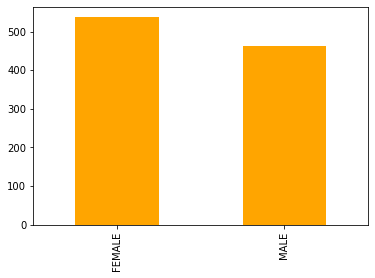

In [8]:
#Value counts of Insured Sex
data['insured_sex'].value_counts().plot(kind='bar',color='orange')

Above 55% females are insured and left 45% are male 

<AxesSubplot:>

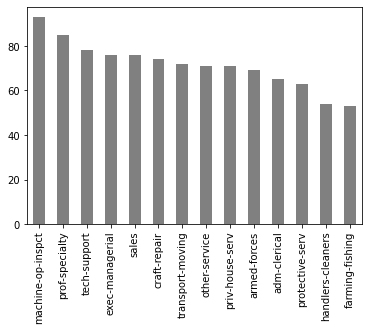

In [9]:
#Value count for insured occupation
data['insured_occupation'].value_counts().plot(kind='bar',color='grey')

Most of the peoples insured are Machine-op-inspct and prof-speciality with least persons insured including farming-fishing & handler-cleaners.

<AxesSubplot:xlabel='insured_education_level', ylabel='count'>

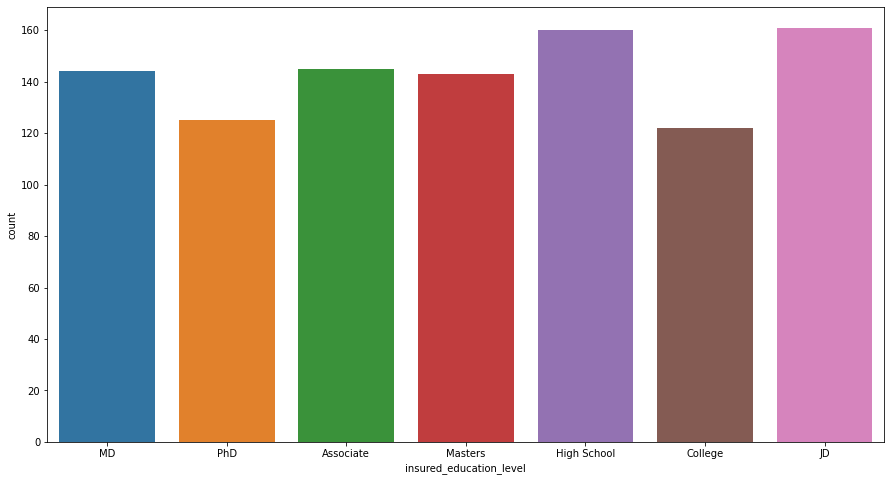

In [10]:
#Countplot to understand insured_education_level
plt.figure(figsize=(15,8))
sns.countplot(x='insured_education_level',data=data)


There is a high tendency of Fraud for peoples you accquired JD 

<AxesSubplot:ylabel='incident_type'>

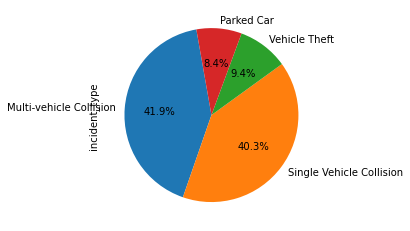

In [11]:
#Value count for incident_type
data['incident_type'].value_counts().plot(kind='pie',startangle=100,autopct='%1.1f%%')

Most Of the incident caused is due to multiple-vehicle collision and single-vehicle collision

<AxesSubplot:ylabel='incident_severity'>

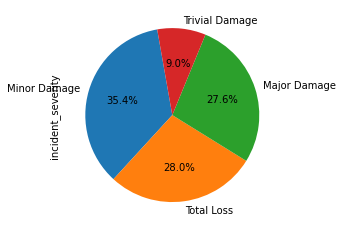

In [12]:
#Value count for incident_severity
data['incident_severity'].value_counts().plot(kind='pie',startangle=100,autopct='%1.1f%%')

Total 35% minor damage is been caused due to incident & and 28% of total loss in it.

<AxesSubplot:>

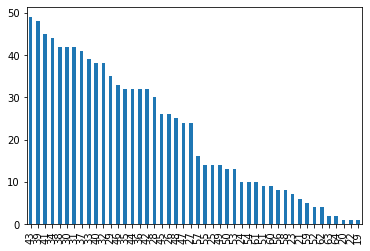

In [13]:
#Value counts of age
data['age'].value_counts().plot(kind='bar')

Most peoples that lies between age 25-57 are included in the report

<AxesSubplot:>

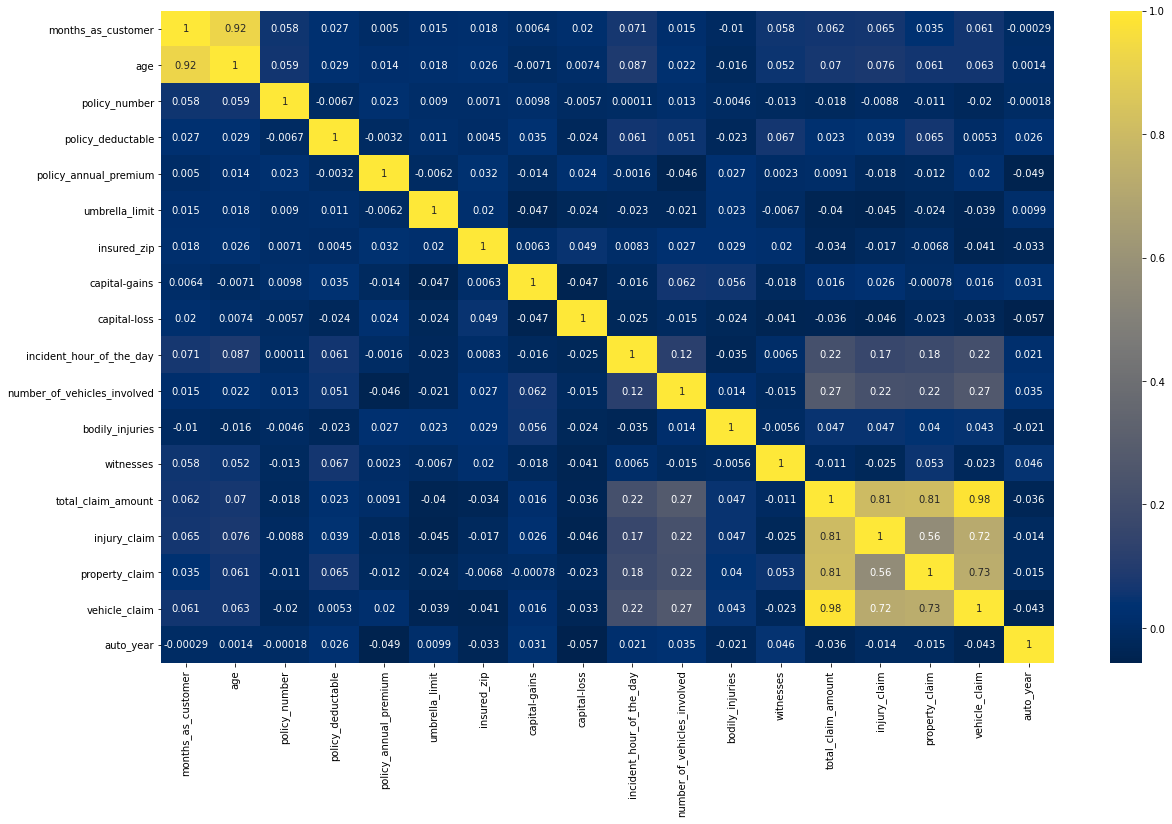

In [14]:
#Correlation
corr=data.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr,cmap='cividis',annot=True)

<AxesSubplot:>

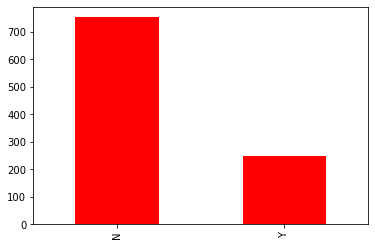

In [15]:
#Value count for fraud_reported
data['fraud_reported'].value_counts().plot(kind='bar',color='red')

It is reported that 75% is reported as fraud and 25% it reported as non-fraud

<AxesSubplot:>

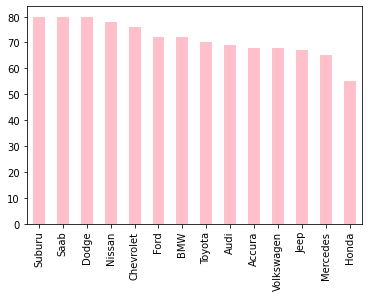

In [16]:
data['auto_make'].value_counts().plot(kind='bar',color='pink')

The total claim amount is high in Saab,Dodge and Suburu

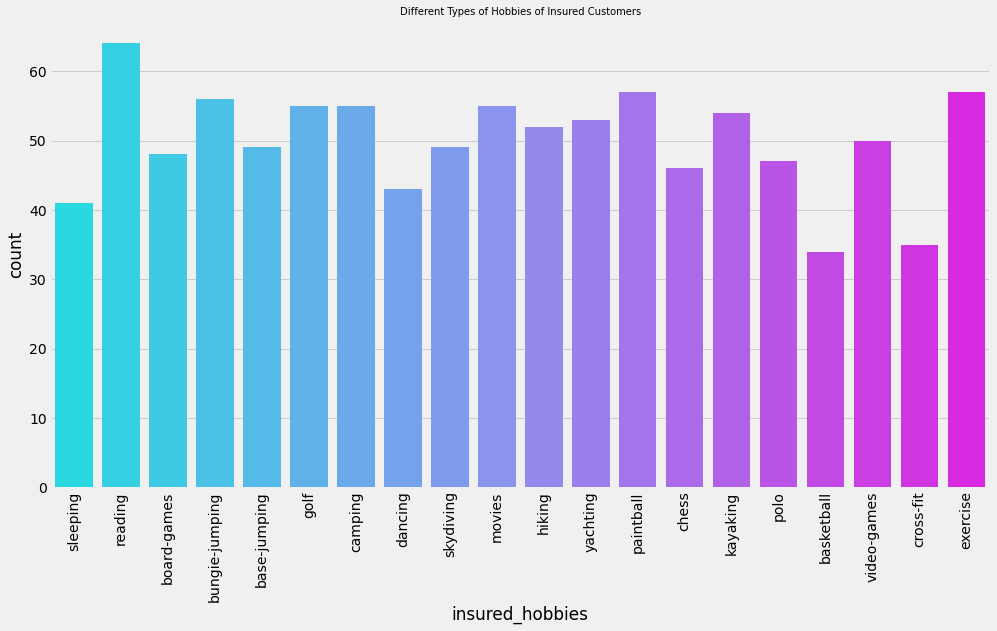

In [17]:
# let's check the insured hobbies

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)

sns.countplot(data['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers', fontsize = 10)
plt.xticks(rotation = 90)
plt.show() 


# DATA PROCESSING

In [18]:
# let's encode the fraud report to numerical values
data['fraud_reported'] = data['fraud_reported'].replace(('Y','N'),(0,1))

In [19]:
# let's extract days, month and year from policy bind date
data['policy_bind_date'] = pd.to_datetime(data['policy_bind_date'], errors = 'coerce')

In [20]:
# let's check the correlation of auto_model with the target
data[['auto_model','fraud_reported']].groupby(['auto_model'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_model,fraud_reported
0,3 Series,0.944444
31,RSX,0.916667
25,Malibu,0.900000
36,Wrangler,0.880952
29,Pathfinder,0.870968
35,Ultima,0.869565
9,Camry,0.857143
11,Corolla,0.850000
8,CRV,0.850000
21,Legacy,0.843750


In [21]:
# let's perform target encoding for auto model

data['auto_model'] = data['auto_model'].replace(('3 Series','RSX','Malibu','Wrangler','Pathfinder','Ultima','Camry',
                'Corolla','CRV','Legacy','Neon','95','TL','93','MDX','Accord','Grand Cherokee','Escape','E4000',
            'A3','Highlander','Passat','92x','Jetta','Fusion','Forrestor','Maxima','Impreza','X5','RAM','M5','A5',
                'Civic','F150','Tahaoe','C300','ML350','Silverado','X6'),
                (0.95,0.92, 0.90,0.88,0.87,0.86,0.86,0.85,0.85,0.84,0.83,0.81,0.80,0.80,0.78,0.77,0.76,0.75,0.74,
                 0.73,0.72,0.72,0.71,0.71,0.71,0.71,0.70,0.70,0.69,0.67,0.66,0.65,0.64,0.63,0.62,0.61,0.60,0.59,0.56))

In [22]:
# let's check the correlation of auto_make with the target
data[['auto_make','fraud_reported']].groupby(['auto_make'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,auto_make,fraud_reported
7,Jeep,0.835821
9,Nissan,0.820513
12,Toyota,0.814286
0,Accura,0.808824
10,Saab,0.775000
11,Suburu,0.762500
4,Dodge,0.750000
6,Honda,0.745455
3,Chevrolet,0.723684
2,BMW,0.722222


In [23]:
data['auto_make']=data['auto_make'].replace(('Jeep','Nissan','Toyota','Accura','Saab','Suburu','Dodge','Honda','Chevrolet','BMW','Volkswagen','Audi','Ford','Mercedes'),
                                            (0.83,0.82,0.81,0.81,0.77,0.76,0.75,0.74,0.72,0.72,0.72,0.69,0.69,0.66))

In [24]:
# let's check the correlation of police_report_available with the target
data[['police_report_available','fraud_reported']].groupby(['police_report_available'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)


,police_report_available,fraud_reported
2,YES,0.770701
1,NO,0.749271
0,?,0.740525


In [25]:
# let's perform target encoding for police_report_available
data['police_report_available'] = data['police_report_available'].replace(('NO','YES','?'),(0.77,0.75,0.75))

In [26]:
data['police_report_available'].value_counts()

0.75    657
0.77    343
Name: police_report_available, dtype: int64

In [27]:
# let's check the correlation of property_damage with the target
data[['property_damage','fraud_reported']].groupby(['property_damage'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,property_damage,fraud_reported
1,NO,0.804734
2,YES,0.741722
0,?,0.713889


In [28]:
data['property_damage'] = data['property_damage'].replace(('NO','YES','?'),(0.80,0.74,0.80))


In [29]:
data['property_damage'].value_counts('NO'=='?')

0.80    698
0.74    302
Name: property_damage, dtype: int64

In [30]:
# let's check the correlation of policy_state with the target
data[['policy_state','fraud_reported']].groupby(['policy_state'], 
                as_index = False).mean().sort_values(by = 'fraud_reported', ascending = False)

,policy_state,fraud_reported
0,IL,0.772189
1,IN,0.745161
2,OH,0.741477


In [31]:
data['policy_state'] = data['policy_state'].replace(('IL','IN','OH'),(0.77,0.74,0.74))

In [32]:
# let's check the correlation of policy_csl with the target
data[['policy_csl','fraud_reported']].groupby(['policy_csl'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,policy_csl,fraud_reported
2,500/1000,0.783333
0,100/300,0.742120
1,250/500,0.737892


In [33]:
data['policy_csl'] = data['policy_csl'].replace(('500/1000','100/300','250/500'),(0.78,0.74,0.74))

In [34]:
# let's check the correlation of insured_sex with the target
data[['insured_sex','fraud_reported']].groupby(['insured_sex'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,insured_sex,fraud_reported
0,FEMALE,0.765363
1,MALE,0.738661


In [35]:
data['insured_sex'] = data['insured_sex'].replace(('FEMALE','MALE'),(0.76,0.74))

In [36]:
# let's check the correlation of insured_education_level with the target
data[['insured_education_level','fraud_reported']].groupby(['insured_education_level'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,insured_education_level,fraud_reported
5,Masters,0.776224
2,High School,0.775000
0,Associate,0.765517
3,JD,0.739130
1,College,0.737705
4,MD,0.736111
6,PhD,0.736000


In [37]:
data['insured_education_level'] = data['insured_education_level'].replace(('Masters','High School','Associate','JD','College','MD','PhD'),(0.77,0.77,0.76,0.73,0.73,0.73,0.7))

In [38]:
# let's check the correlation of insured_occupation with the target
data[['insured_occupation','fraud_reported']].groupby(['insured_occupation'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,insured_occupation,fraud_reported
7,other-service,0.830986
8,priv-house-serv,0.830986
0,adm-clerical,0.830769
5,handlers-cleaners,0.796296
9,prof-specialty,0.788235
10,protective-serv,0.777778
6,machine-op-inspct,0.763441
1,armed-forces,0.753623
11,sales,0.723684
12,tech-support,0.717949


In [39]:
# let's perform target encoding for insured_occupation
data['insured_occupation'] = data['insured_occupation'].replace(('other-service','priv-house-serv',
                        'adm-clerical','handlers-cleaners','prof-specialty','protective-serv',
                'machine-op-inspct','armed-forces','sales','tech-support','transport-moving','craft-repair',
                    'farming-fishing','exec-managerial'),(0.83, 0.83,0.83, 0.79,0.78,0.77,0.76,0.75,0.72,0.71,
                                                          0.705,0.70,0.69,0.63))

In [40]:
# let's check the correlation of insured_hobbies with the target
data[['insured_hobbies','fraud_reported']].groupby(['insured_hobbies'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,insured_hobbies,fraud_reported
4,camping,0.909091
11,kayaking,0.907407
9,golf,0.890909
7,dancing,0.883721
3,bungie-jumping,0.839286
12,movies,0.836364
1,basketball,0.823529
8,exercise,0.807018
17,sleeping,0.804878
18,video-games,0.800000


In [41]:
# let's perform target encoding for insured_hobbies
data['insured_hobbies'] = data['insured_hobbies'].replace(('camping', 'kayaking', 'golf','dancing',
        'bungie-jumping','movies', 'basketball','exercise','sleeping','video-games','skydiving','paintball',
            'hiking','base-jumping','reading','polo','board-games','yachting', 'cross-fit','chess'),(0.91, 0.90,
                0.89, 0.88,0.84,0.83,0.82,0.81,0.805,0.80,0.78,0.77,0.76,0.73,0.73,0.72,0.70,0.69,0.25,0.17))

In [42]:
# let's check the correlation of insured_relationship with the target
data[['insured_relationship','fraud_reported']].groupby(['insured_relationship'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,insured_relationship,fraud_reported
0,husband,0.794118
3,own-child,0.786885
4,unmarried,0.758865
1,not-in-family,0.741379
5,wife,0.729032
2,other-relative,0.706215


In [43]:
# let's do target encoding for insured relationship
data['insured_relationship'] = data['insured_relationship'].replace(('husband','own-child','unmarried',
                                        'not-in-family','wife','other-relative'),(0.79,0.78,0.75,0.74,0.72,0.70))

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           1000 non-null   int64         
 1   age                          1000 non-null   int64         
 2   policy_number                1000 non-null   int64         
 3   policy_bind_date             1000 non-null   datetime64[ns]
 4   policy_state                 1000 non-null   float64       
 5   policy_csl                   1000 non-null   float64       
 6   policy_deductable            1000 non-null   int64         
 7   policy_annual_premium        1000 non-null   float64       
 8   umbrella_limit               1000 non-null   int64         
 9   insured_zip                  1000 non-null   int64         
 10  insured_sex                  1000 non-null   float64       
 11  insured_education_level      1000 non-null  

In [45]:
# let's check the correlation of incident_type  with the target
data[['incident_type','fraud_reported']].groupby(['incident_type'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,incident_type,fraud_reported
3,Vehicle Theft,0.914894
1,Parked Car,0.904762
0,Multi-vehicle Collision,0.727924
2,Single Vehicle Collision,0.709677


In [46]:
data['incident_type'] = data['incident_type'].replace(('Vehicle Theft','Parked Car','Multi-vehicle Collision','Single Vehicle Collision'),(0.91,0.90,0.73,0.70))

In [47]:
# let's check the correlation of collision_type  with the target
data[['collision_type','fraud_reported']].groupby(['collision_type'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,collision_type,fraud_reported
0,?,0.910112
3,Side Collision,0.746377
1,Front Collision,0.724409
2,Rear Collision,0.688356


In [48]:
data['collision_type'] = data['collision_type'].replace(('?','Side Collision','Front Collision',
                                        'Rear Collision'),(0.91,0.74,0.72,0.68))

In [49]:
# let's check the correlation of incident_severity  with the target
data[['incident_severity','fraud_reported']].groupby(['incident_severity'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,incident_severity,fraud_reported
3,Trivial Damage,0.933333
1,Minor Damage,0.892655
2,Total Loss,0.871429
0,Major Damage,0.394928


In [50]:
data['incident_severity'] = data['incident_severity'].replace(('Trivial Damage','Minor Damage','Total Loss',
                                        'Major Damage'),(0.93,0.89,0.87,0.39))

In [51]:
# let's check the correlation of authorities_contacted  with the target
data[['authorities_contacted','fraud_reported']].groupby(['authorities_contacted'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,authorities_contacted,fraud_reported
2,None,0.934066
4,Police,0.791096
1,Fire,0.730942
0,Ambulance,0.709184
3,Other,0.681818


In [52]:
data['authorities_contacted'] = data['authorities_contacted'].replace(('None','Police','Fire',
                                        'Ambulance','Other'),(0.93,0.79,0.73,0.70,0.68))

In [53]:
# let's check the correlation of incident_state  with the target
data[['incident_state','fraud_reported']].groupby(['incident_state'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,incident_state,fraud_reported
6,WV,0.820276
1,NY,0.778626
5,VA,0.772727
3,PA,0.733333
4,SC,0.705645
0,NC,0.690909
2,OH,0.565217


In [54]:
data['incident_state'] = data['incident_state'].replace(('WV','NY','VA',
                                        'PA','SC','NC','OH'),(0.82,0.78,0.77,0.73,0.70,0.69,0.56))

In [55]:
# let's check the correlation of incident_city with the target
data[['incident_city','fraud_reported']].groupby(['incident_city'], 
                as_index = False).mean().sort_values(by ='fraud_reported', ascending = False)

,incident_city,fraud_reported
4,Northbrook,0.778689
5,Riverwood,0.776119
3,Northbend,0.765517
6,Springfield,0.757962
2,Hillsdale,0.751773
1,Columbus,0.738255
0,Arlington,0.710526


In [56]:
data['incident_city'] = data['incident_state'].replace(('Northbrook','Riverwood','Northbend',
                                        'Springfield','Hillsdale','Columbus','Arlington'),(0.78,0.77,0.76,0.75,0.75,0.73,0.71))

In [57]:
#Droping date column
data=data.drop(['policy_bind_date','incident_date','incident_location','auto_model'],axis=1)

# Feature Engineering

In [58]:
#Spliting data into x and y for feature engineering
x=data.drop('fraud_reported',axis=1)
y=data.fraud_reported

In [59]:
x.shape

(1000, 34)

In [60]:
y.shape

(1000,)

[0.02103945 0.02122407 0.0232201  0.01532661 0.0133314  0.01773953
 0.02252723 0.01698743 0.02288654 0.01582135 0.02266992 0.02646492
 0.13615831 0.0235175  0.01802804 0.02012581 0.01679553 0.02296966
 0.21667823 0.02096545 0.02157643 0.02227336 0.02047575 0.01283062
 0.01408275 0.02072613 0.02084278 0.01442914 0.02401622 0.02335127
 0.02194426 0.02447524 0.02175438 0.02274457]


<AxesSubplot:>

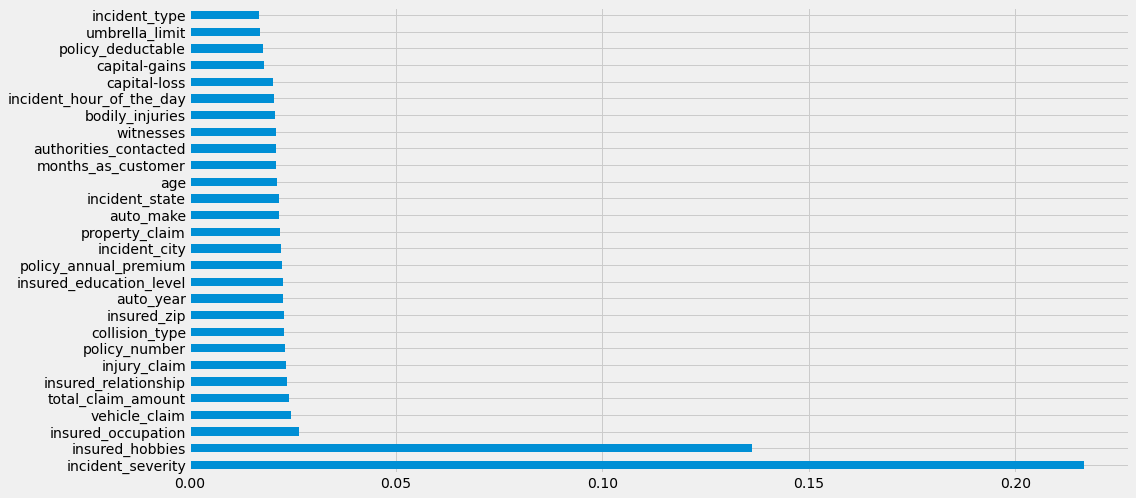

In [61]:
#Feature Importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
feature_imp.nlargest(28).plot(kind='barh')

In [62]:
x=data.drop('fraud_reported',axis=1)
y=data.fraud_reported

In [63]:
x.shape

(1000, 34)

In [64]:
y.shape

(1000,)

# Spliting Data 

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=22)

In [66]:
x_train.shape

(800, 34)

In [67]:
x_test.shape

(200, 34)

# Model Building

In [68]:
log=pd.DataFrame(columns=["Model", "Accuracy"])

Training Accuracy:  1.0
Testing Accuarcy:  0.86
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        48
           1       0.91      0.91      0.91       152

    accuracy                           0.86       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.86      0.86      0.86       200



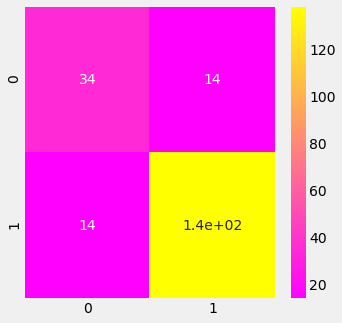

In [69]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix               

model = RandomForestClassifier(n_estimators =50, random_state = 22)
model.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)

print("Training Accuracy: ", model.score(x_train, y_train))
print('Testing Accuarcy: ', model.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'spring')
plt.show()


In [70]:
log =log.append({"Model": " Random Forest", "Accuracy":  model.score(x_test, y_test)}, ignore_index=True)

In [71]:
log

,Model,Accuracy
0,Random Forest,0.86


Training Accuracy:  0.75125
Testing Accuarcy:  0.76
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        48
           1       0.91      0.91      0.91       152

    accuracy                           0.86       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.86      0.86      0.86       200



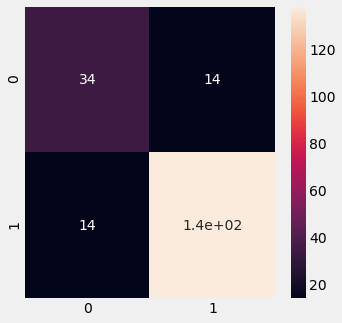

In [72]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model1 = SVC()
model1.fit(x_train, y_train)
y_pred_rf = model.predict(x_test)
print("Training Accuracy: ", model1.score(x_train, y_train))
print('Testing Accuarcy: ', model1.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'rocket')
plt.show()

In [73]:
log =log.append({"Model": " SVC", "Accuracy":  model1.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.88375
Testing Accuarcy:  0.83
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        48
           1       0.87      0.91      0.89       152

    accuracy                           0.83       200
   macro avg       0.77      0.75      0.76       200
weighted avg       0.82      0.83      0.83       200



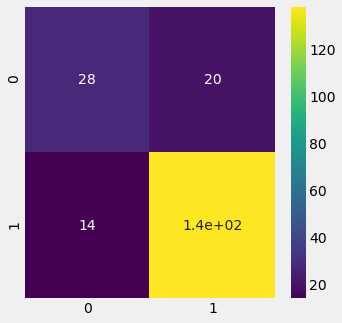

In [74]:
#DECISION TREE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
model2 =DecisionTreeClassifier(criterion='entropy',max_depth=5)
model2.fit(x_train, y_train)
y_pred_rf = model2.predict(x_test)
print("Training Accuracy: ", model2.score(x_train, y_train))
print('Testing Accuarcy: ', model2.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'viridis')
plt.show()

In [75]:
log =log.append({"Model": "DECISION TREE", "Accuracy":  model2.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.75375
Testing Accuarcy:  0.75
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.76      0.99      0.86       152

    accuracy                           0.75       200
   macro avg       0.38      0.49      0.43       200
weighted avg       0.58      0.75      0.65       200



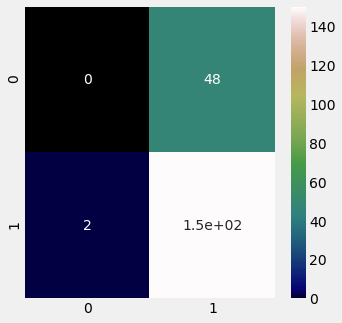

In [76]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model3 =KNeighborsClassifier(n_neighbors=15)
model3.fit(x_train, y_train)
y_pred_rf = model3.predict(x_test)
print("Training Accuracy: ", model3.score(x_train, y_train))
print('Testing Accuarcy: ', model3.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'gist_earth')
plt.show()

###### log =log.append({"Model": "KNN", "Accuracy":  model3.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.95125
Testing Accuarcy:  0.795
              precision    recall  f1-score   support

           0       0.57      0.58      0.58        48
           1       0.87      0.86      0.86       152

    accuracy                           0.80       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.80      0.80      0.80       200



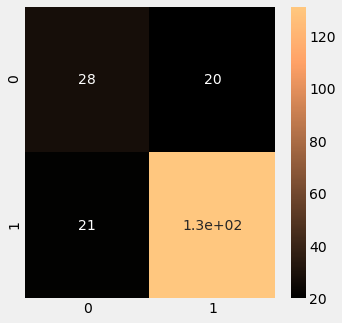

In [77]:
#ADA BOOST
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model4 =AdaBoostClassifier(n_estimators=200,random_state=22)
model4.fit(x_train, y_train)
y_pred_rf = model4.predict(x_test)
print("Training Accuracy: ", model4.score(x_train, y_train))
print('Testing Accuarcy: ', model4.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [78]:
log =log.append({"Model": "Adaboost", "Accuracy":  model4.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.8825
Testing Accuarcy:  0.815
              precision    recall  f1-score   support

           0       0.65      0.50      0.56        48
           1       0.85      0.91      0.88       152

    accuracy                           0.81       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.80      0.81      0.81       200



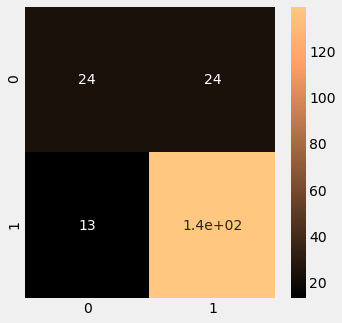

In [79]:
#Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model5 =GradientBoostingClassifier(learning_rate=0.01,random_state=22)
model5.fit(x_train, y_train)
y_pred_rf = model5.predict(x_test)
print("Training Accuracy: ", model5.score(x_train, y_train))
print('Testing Accuarcy: ', model5.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()

In [80]:
log =log.append({"Model": "Gradient Boosting ", "Accuracy":  model5.score(x_test, y_test)}, ignore_index=True)

[15:29:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.96125
Testing Accuarcy:  0.865
              precision    recall  f1-score   support

           0       0.68      0.83      0.75        48
           1       0.94      0.88      0.91       152

    accuracy                           0.86       200
   macro avg       0.81      0.85      0.83       200
weighted avg       0.88      0.86      0.87       200



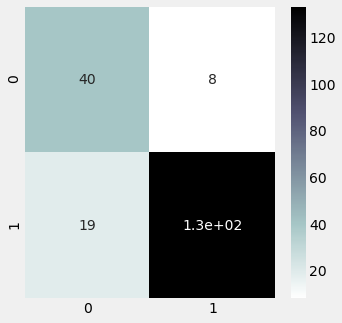

In [81]:
#XGBM
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model6 =xgb.XGBClassifier(random_state=22,learning_rate=0.01)
model6.fit(x_train, y_train)
y_pred_rf = model6.predict(x_test)
print("Training Accuracy: ", model6.score(x_train, y_train))
print('Testing Accuarcy: ', model6.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'bone_r')
plt.show()

In [82]:
log =log.append({"Model": "XGBM", "Accuracy":  model6.score(x_test, y_test)}, ignore_index=True)

Training Accuracy:  0.75
Testing Accuarcy:  0.765
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.76      1.00      0.87       152

    accuracy                           0.77       200
   macro avg       0.88      0.51      0.45       200
weighted avg       0.82      0.77      0.67       200



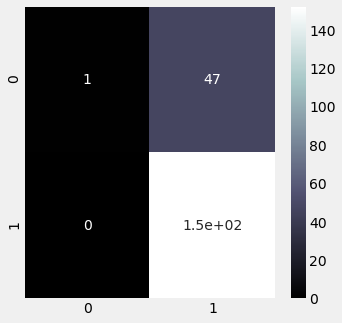

In [83]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model7 =LogisticRegression(max_iter=180)
model7.fit(x_train, y_train)
y_pred_rf = model7.predict(x_test)
print("Training Accuracy: ", model7.score(x_train, y_train))
print('Testing Accuarcy: ', model7.score(x_test, y_test))

# making a classification report
cr = classification_report(y_test,  y_pred_rf)
print(cr)

# making a confusion matrix
plt.rcParams['figure.figsize'] = (5, 5)
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot = True, cmap = 'bone')
plt.show()

In [84]:
log =log.append({"Model": "Logistic Regression", "Accuracy":  model7.score(x_test, y_test)}, ignore_index=True)

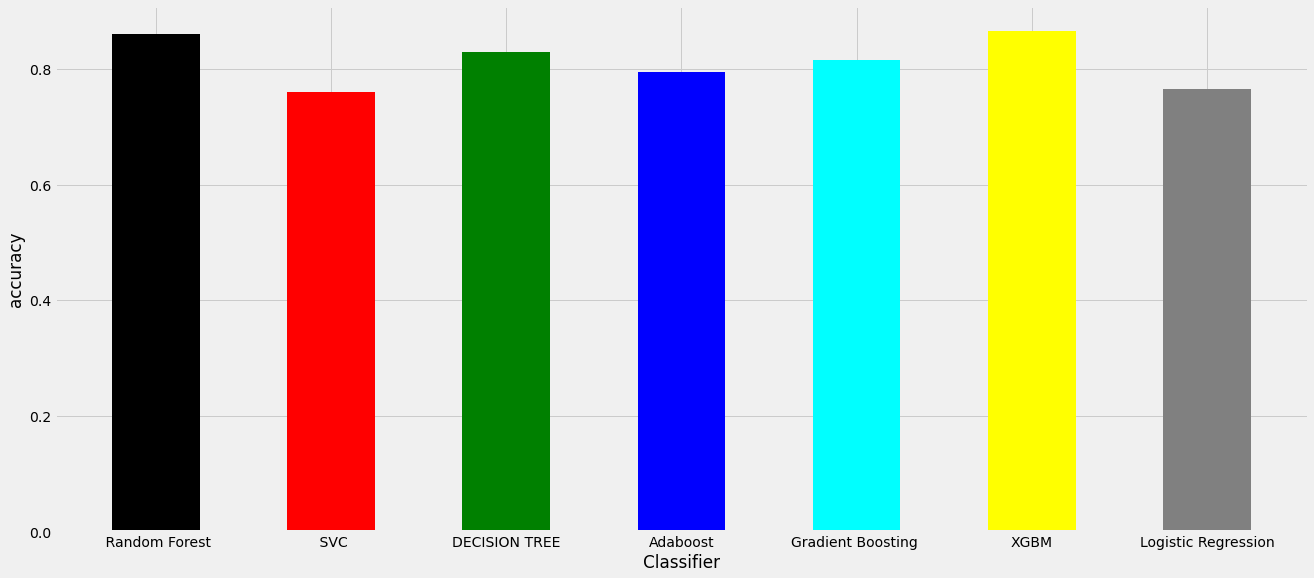

In [85]:
plt.figure(figsize=(20, 9))
plt.bar(log["Model"], log["Accuracy"], width=0.5,color=['black', 'red', 'green', 'blue', 'cyan','yellow','grey','pink'])
plt.xlabel("Classifier")
plt.ylabel("accuracy")
plt.show()


In [86]:
log

,Model,Accuracy
0,Random Forest,0.860
1,SVC,0.760
2,DECISION TREE,0.830
3,Adaboost,0.795
4,Gradient Boosting,0.815
5,XGBM,0.865
6,Logistic Regression,0.765


Therefore Random Forest & XGBM gives us the best accuracy for predicting Fraud Insurance Claimed for a car.